<a href="https://colab.research.google.com/github/Adwait-Naravane/Projects--comp-phy-/blob/Computational-Quantum-mech/Quantum_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
plt.style.use('dark_background')
from scipy import sparse
from numba import jit



The Schrodinger equation numerically becomes for 2d. \\
image.png

D has -2 along diagonals and 1 along right and left of it. 

In [ ]:
N = 200
X, Y = np.meshgrid(np.linspace(0,1,N, dtype=float),
                   np.linspace(0,1,N, dtype=float))

In [ ]:
@jit(nopython = True)


def get_potential(x, y):
    return np.abs((x-1/2)*(y-1/2))
V = get_potential(X,Y)
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)
U = sparse.diags(V.reshape(N**2), (0))
H = T+U
eigenvalues, eigenvectors = eigsh(H, k=10, which='SM')


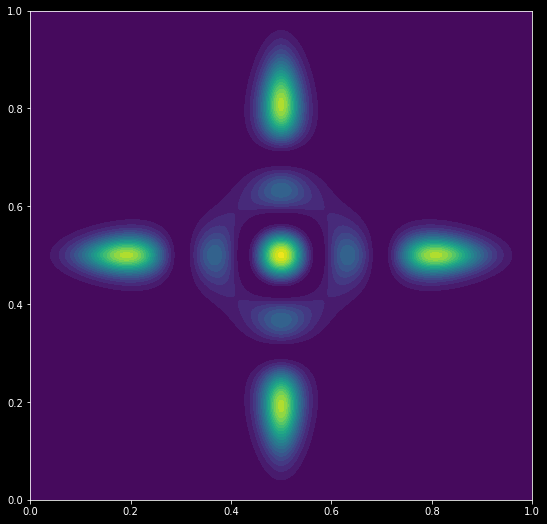

In [ ]:
def get_e(n):
    return eigenvectors.T[n].reshape((N,N))
plt.figure(figsize=(9,9))
plt.contourf(X, Y, get_e(8)**2, 20)


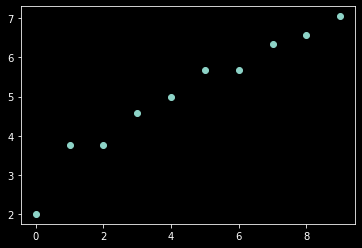

In [ ]:
alpha = eigenvalues[0]/2
E_div_alpha = eigenvalues/alpha
_ = np.arange(0, len(eigenvalues), 1)
plt.scatter(_, E_div_alpha)